<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 8</b></center>    
<pre>    

# Step 1: Import Libraries
This step imports all necessary libraries for data processing, visualization, and machine learning.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Step 2: Load the Dataset
Load Given dataset -  heart.csv

In [13]:
df = pd.read_csv("heart.csv")

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [15]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

# Step 4: Univariate Analysis
Here we visualize the distribution of each feature using histograms.

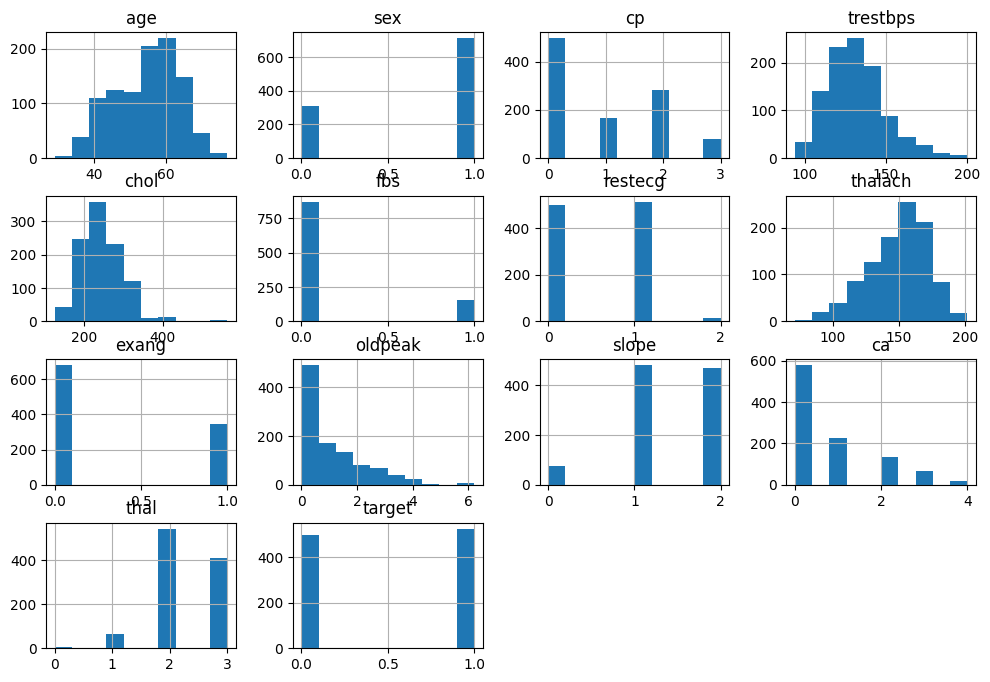

In [16]:
df.hist(figsize=(12,8))
plt.show()

# Step 5: Bivariate Analysis
This step involves exploring the correlations between features using a heatmap.

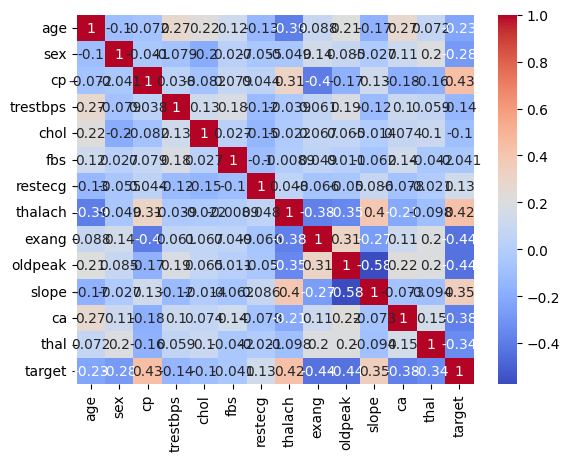

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

# Step 6: Outlier Detection
We visualize potential outliers using boxplots.

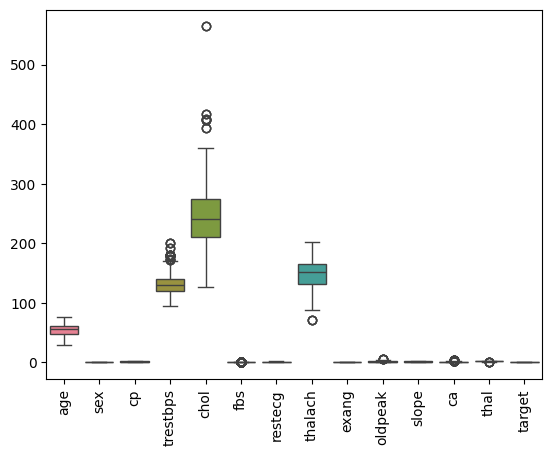

In [20]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Step 7: Split Data into Training and Testing Sets
The dataset is split into training and testing sets for model evaluation.

In [22]:
x = df.drop('target',axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

# Step 8: Train Decision Tree
We train a Decision Tree Classifier on the training data. You have to also check for KNeighborsClassifier and  GaussianNB

In [23]:
m1 = DecisionTreeClassifier()
m1.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
m2 = KNeighborsClassifier()
m2.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
m3 = GaussianNB()
m3.fit(x_train,y_train)

GaussianNB()

# Step 9: Evaluate Decision Tree
We evaluate the Decision Tree model using accuracy, confusion matrix, and classification report.

In [28]:
y_pred = m1.predict(x_test)
print("Decision Tree Accuracy : ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = m2.predict(x_test)
print("KNeighbors Accuracy : ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = m3.predict(x_test)
print("GaussianNB Accuracy : ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Accuracy :  0.9707792207792207
[[142   3]
 [  6 157]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       145
           1       0.98      0.96      0.97       163

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308

KNeighbors Accuracy :  0.7142857142857143
[[106  39]
 [ 49 114]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       145
           1       0.75      0.70      0.72       163

    accuracy                           0.71       308
   macro avg       0.71      0.72      0.71       308
weighted avg       0.72      0.71      0.71       308

GaussianNB Accuracy :  0.7857142857142857
[[110  35]
 [ 31 132]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       145
           1       0.79      0.81      

# Step 10: Visualize Decision Tree
Here we visualize the structure of the trained Decision Tree.

[Text(0.5638297872340425, 0.9545454545454546, 'x[2] <= 0.5\ngini = 0.5\nsamples = 717\nvalue = [354.0, 363.0]'),
 Text(0.3191489361702128, 0.8636363636363636, 'x[12] <= 2.5\ngini = 0.36\nsamples = 357\nvalue = [273, 84]'),
 Text(0.44148936170212766, 0.9090909090909092, 'True  '),
 Text(0.2127659574468085, 0.7727272727272727, 'x[11] <= 0.5\ngini = 0.498\nsamples = 155\nvalue = [82, 73]'),
 Text(0.10638297872340426, 0.6818181818181818, 'x[8] <= 0.5\ngini = 0.411\nsamples = 90\nvalue = [26.0, 64.0]'),
 Text(0.0425531914893617, 0.5909090909090909, 'x[7] <= 96.5\ngini = 0.168\nsamples = 54\nvalue = [5, 49]'),
 Text(0.02127659574468085, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.06382978723404255, 0.5, 'x[4] <= 316.5\ngini = 0.075\nsamples = 51\nvalue = [2, 49]'),
 Text(0.0425531914893617, 0.4090909090909091, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]'),
 Text(0.0851063829787234, 0.4090909090909091, 'x[10] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.06382978723

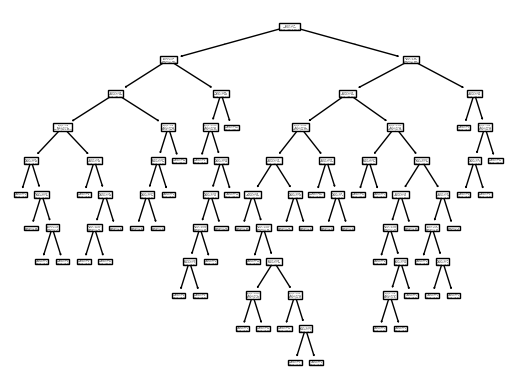

In [29]:
tree.plot_tree(m1)

# Step 11: Train Bagging Classifier
We train a Bagging Classifier with Decision Trees as the base model.

In [33]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

# Step 12: Evaluate Bagging Classifier
The Bagging model is evaluated using accuracy.

In [35]:
y_pred_bagging = bagging.predict(x_test)
print("Bagging Accuracy : ", accuracy_score(y_test,y_pred_bagging))

Bagging Accuracy :  0.9805194805194806


# Step 13: Train Random Forest
We train a Random Forest Classifier on the dataset.

In [36]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# Step 14: Feature Importance in Random Forest
We analyze feature importance as determined by the Random Forest model.

# Step 15: Evaluate Random Forest
We evaluate the Random Forest model using accuracy.

In [43]:
y_pred_rf = rf.predict(x_test)
print("Random Forest Accuracy : ", accuracy_score(y_test,y_pred_rf))

Random Forest Accuracy :  0.9902597402597403


# Step 16: Train AdaBoost Classifier
We train an AdaBoost Classifier on the dataset.

In [42]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42, estimator=DecisionTreeClassifier(max_depth=10))
ada.fit(x_train,y_train)

C:\Users\Hensi Doshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=100, random_state=42)

# Step 17: Evaluate AdaBoost Classifier
The AdaBoost model is evaluated using accuracy.

In [45]:
y_pred_ada = ada.predict(x_test)
print("Ada Boost Accuracy : ", accuracy_score(y_test,y_pred_ada))

Ada Boost Accuracy :  0.961038961038961
